<a href="https://colab.research.google.com/github/rajatmishra123456/datasetrm/blob/main/Data_Preprocessing_with_Titanic_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
# Data Preprocessing Pipeline
# This notebook demonstrates a comprehensive data preprocessing workflow
# including EDA, missing value handling, outlier detection, feature selection, and handling imbalanced data

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.feature_selection import SelectKBest, chi2, f_classif, RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import warnings
warnings.filterwarnings('ignore')

In [99]:
# Set styling for plots
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("viridis")

print("1. LOADING AND EXPLORING THE DATASET")
print("-" * 50)

1. LOADING AND EXPLORING THE DATASET
--------------------------------------------------


In [100]:
# Load the dataset - using Titanic dataset as an example
# Note: You can replace this with any other popular Kaggle dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

In [101]:
# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nFirst few rows of the dataset:")
df.head()

Dataset Shape: (891, 12)

First few rows of the dataset:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [102]:
# Display information about the dataset
print("\nDataset Information:")
df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [103]:
# Get statistical summary
print("\nStatistical Summary:")
df.describe()


Statistical Summary:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [104]:
# Check for missing values
print("\nMissing values in each column:")
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})
missing_data[missing_data['Missing Values'] > 0]


Missing values in each column:


,Missing Values,Percentage
Age,177,19.865320
Cabin,687,77.104377
Embarked,2,0.224467


In [105]:
# Create visualizations for initial EDA
print("\nCreating EDA visualizations...")


Creating EDA visualizations...


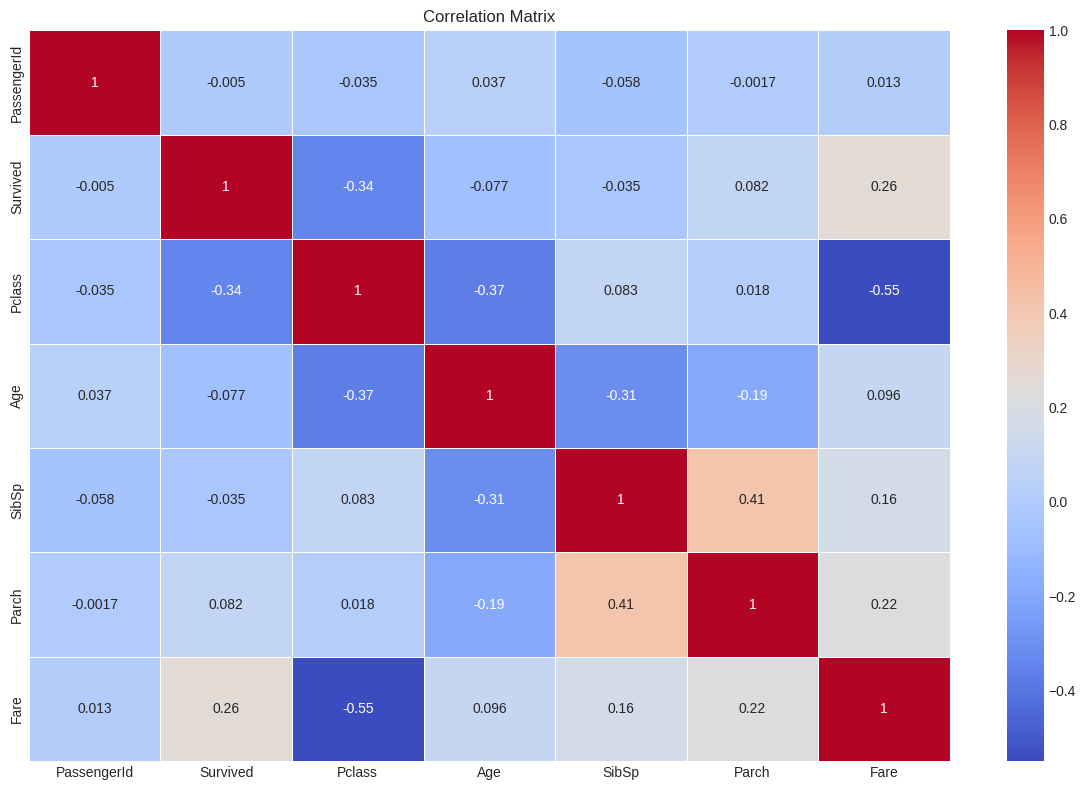

In [106]:
# Correlation matrix for numerical features
plt.figure(figsize=(12, 8))
numerical_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()
plt.savefig('correlation_matrix.png')
plt.close()

In [107]:
print("\n2. HANDLING MISSING VALUES")
print("-" * 50)


2. HANDLING MISSING VALUES
--------------------------------------------------


In [108]:
# Make a copy to avoid modifying original data
df_processed = df.copy()

In [109]:
# Strategy 1: Remove columns with too many missing values
high_missing_cols = missing_data[missing_data['Percentage'] > 50].index.tolist()
if high_missing_cols:
    print(f"Removing columns with >50% missing values: {high_missing_cols}")
    df_processed.drop(columns=high_missing_cols, inplace=True)

Removing columns with >50% missing values: ['Cabin']


In [110]:
# Strategy 2: Simple imputation for remaining missing values
# Impute numerical features with median
numerical_cols = df_processed.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    if df_processed[col].isnull().sum() > 0:
        print(f"Imputing missing values in '{col}' with median")
        median_value = df_processed[col].median()
        df_processed[col].fillna(median_value, inplace=True)

Imputing missing values in 'Age' with median


In [111]:
# Impute categorical features with mode
categorical_cols = df_processed.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if df_processed[col].isnull().sum() > 0:
        print(f"Imputing missing values in '{col}' with mode")
        mode_value = df_processed[col].mode()[0]
        df_processed[col].fillna(mode_value, inplace=True)

Imputing missing values in 'Embarked' with mode


In [112]:
# Alternative approach using SimpleImputer for all numerical columns at once
# print("\nHandling missing values in numerical columns with median imputation:")
# numerical_imputer = SimpleImputer(strategy='median')
# df_processed[numerical_cols] = numerical_imputer.fit_transform(df_processed[numerical_cols])

In [113]:
# Verify missing values have been handled
print("\nRemaining missing values after imputation:")
print(df_processed.isnull().sum())

print("\n3. DETECTING AND HANDLING OUTLIERS")
print("-" * 50)


Remaining missing values after imputation:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

3. DETECTING AND HANDLING OUTLIERS
--------------------------------------------------


In [114]:
# Function for outlier detection using IQR method
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

In [115]:
# Function for outlier detection using Z-score method
def detect_outliers_zscore(df, column, threshold=3):
    z_scores = (df[column] - df[column].mean()) / df[column].std()
    outliers = df[abs(z_scores) > threshold]
    return outliers


Outliers in Age using IQR method: 66
Outliers in Age using Z-score method: 7


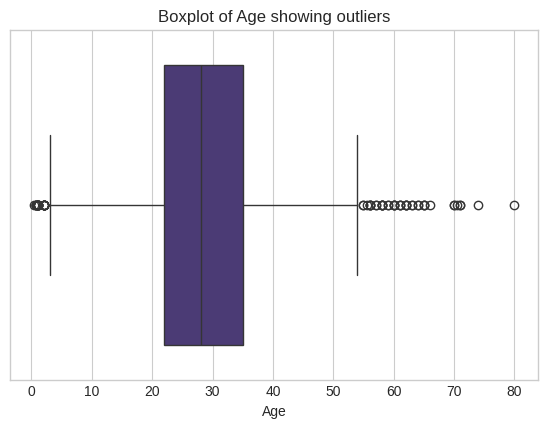


Outliers in Fare using IQR method: 116
Outliers in Fare using Z-score method: 20


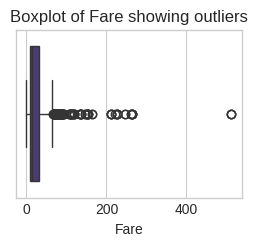

In [116]:
# Detect and visualize outliers for numerical features
numerical_columns = ['Age', 'Fare']
plt.figure(figsize=(15, 10))

for i, column in enumerate(numerical_columns):
    # IQR method
    outliers_iqr, lower_bound, upper_bound = detect_outliers_iqr(df_processed, column)
    print(f"\nOutliers in {column} using IQR method: {len(outliers_iqr)}")

    # Z-score method
    outliers_zscore = detect_outliers_zscore(df_processed, column)
    print(f"Outliers in {column} using Z-score method: {len(outliers_zscore)}")

    # Visualize outliers with boxplot
    plt.subplot(len(numerical_columns), 2, 2*i+1)
    sns.boxplot(x=df_processed[column])
    plt.title(f'Boxplot of {column} showing outliers')
    plt.show()

In [117]:
# Handle outliers by capping
print("\nHandling outliers by capping (Winsorization):")
for column in numerical_columns:
    _, lower_bound, upper_bound = detect_outliers_iqr(df_processed, column)
    # Cap the outliers
    df_processed[column] = df_processed[column].clip(lower=lower_bound, upper=upper_bound)
    print(f"Capped outliers in {column}")


Handling outliers by capping (Winsorization):
Capped outliers in Age
Capped outliers in Fare


In [118]:
# Verify outliers have been handled
for column in numerical_columns:
    outliers_iqr, _, _ = detect_outliers_iqr(df_processed, column)
    print(f"Remaining outliers in {column} after capping: {len(outliers_iqr)}")

print("\n4. FEATURE SELECTION")
print("-" * 50)

Remaining outliers in Age after capping: 0
Remaining outliers in Fare after capping: 0

4. FEATURE SELECTION
--------------------------------------------------


In [119]:
# Prepare data for feature selection
# Drop non-numeric columns and columns that shouldn't be used for selection
features = df_processed.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Survived'], axis=1, errors='ignore')
target = df_processed['Survived']

In [120]:
# Convert categorical variables to numeric for feature selection
categorical_cols = features.select_dtypes(include=['object']).columns
for col in categorical_cols:
    features[col] = LabelEncoder().fit_transform(features[col])

In [121]:
# Method 1: Filter Method - Chi-Square test for classification
print("\nFilter Method - Chi-Square Test:")
try:
    chi_selector = SelectKBest(chi2, k=4)
    chi_selector.fit(features, target)
    chi_support = chi_selector.get_support()
    chi_selected_features = features.columns[chi_support]
    print(f"Selected features by Chi-Square test: {list(chi_selected_features)}")

    # Feature scores
    chi_scores = chi_selector.scores_
    chi_scores_df = pd.DataFrame({'Feature': features.columns, 'Chi-Square Score': chi_scores})
    chi_scores_df = chi_scores_df.sort_values('Chi-Square Score', ascending=False)
    print(chi_scores_df)
except Exception as e:
    print(f"Could not perform chi-square test: {e}")
    print("Using ANOVA F-test instead for feature selection...")
    f_selector = SelectKBest(f_classif, k=4)
    f_selector.fit(features, target)
    f_support = f_selector.get_support()
    f_selected_features = features.columns[f_support]
    print(f"Selected features by ANOVA F-test: {list(f_selected_features)}")


Filter Method - Chi-Square Test:
Selected features by Chi-Square test: ['Pclass', 'Sex', 'Age', 'Fare']
    Feature  Chi-Square Score
5      Fare       1564.437823
1       Sex         92.702447
0    Pclass         30.873699
2       Age         16.414664
6  Embarked         10.202525
4     Parch         10.097499
3     SibSp          2.581865


In [122]:
# Method 2: Wrapper Method - Recursive Feature Elimination (RFE)
print("\nWrapper Method - Recursive Feature Elimination:")
model = RandomForestClassifier(random_state=42)
rfe = RFE(estimator=model, n_features_to_select=4)
rfe = rfe.fit(features, target)
rfe_support = rfe.support_
rfe_selected_features = features.columns[rfe_support]
print(f"Selected features by RFE: {list(rfe_selected_features)}")


Wrapper Method - Recursive Feature Elimination:
Selected features by RFE: ['Pclass', 'Sex', 'Age', 'Fare']


In [123]:
# Method 3: Embedded Method - Feature Importance from Random Forest
print("\nEmbedded Method - Random Forest Feature Importance:")
model = RandomForestClassifier(random_state=42)
model.fit(features, target)
importance = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features.columns, 'Importance': importance})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)
print(feature_importance_df)


Embedded Method - Random Forest Feature Importance:
    Feature  Importance
1       Sex    0.265834
2       Age    0.259300
5      Fare    0.259295
0    Pclass    0.090302
3     SibSp    0.049205
4     Parch    0.041296
6  Embarked    0.034768


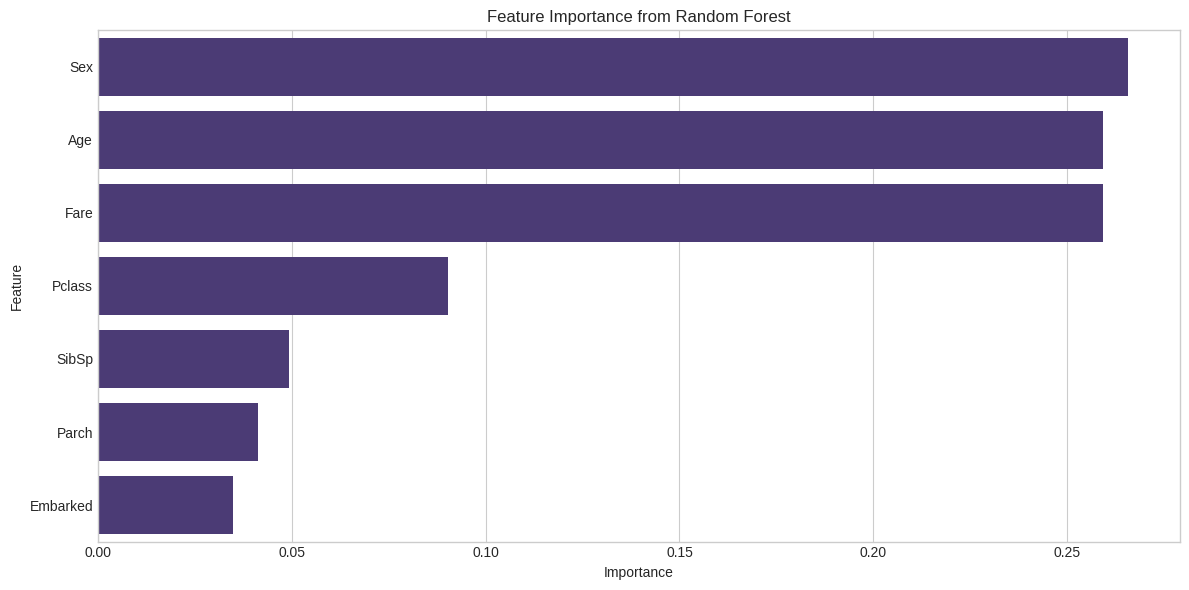

In [124]:
# Visualize feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance from Random Forest')
plt.tight_layout()
plt.show()
plt.savefig('feature_importance.png')
plt.close()

In [125]:
# Select the top features based on feature importance
top_features = feature_importance_df['Feature'].head(5).tolist()
print(f"\nTop 5 features selected for further processing: {top_features}")


Top 5 features selected for further processing: ['Sex', 'Age', 'Fare', 'Pclass', 'SibSp']


In [126]:
# Keep the selected features plus the target
selected_columns = top_features + ['Survived']
df_selected = df_processed[selected_columns]

print("\n5. FEATURE TRANSFORMATION")
print("-" * 50)

df_transformed = df_selected.copy()


5. FEATURE TRANSFORMATION
--------------------------------------------------


In [127]:
# Identify numeric and categorical columns in the selected data
numeric_columns = df_transformed.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_columns = df_transformed.select_dtypes(include=['object']).columns.tolist()

In [128]:
# Remove the target variable from the columns to transform
if 'Survived' in numeric_columns:
    numeric_columns.remove('Survived')


Applying Min-Max Scaling:
Min-Max Scaling applied to: ['Age', 'Fare', 'Pclass', 'SibSp']


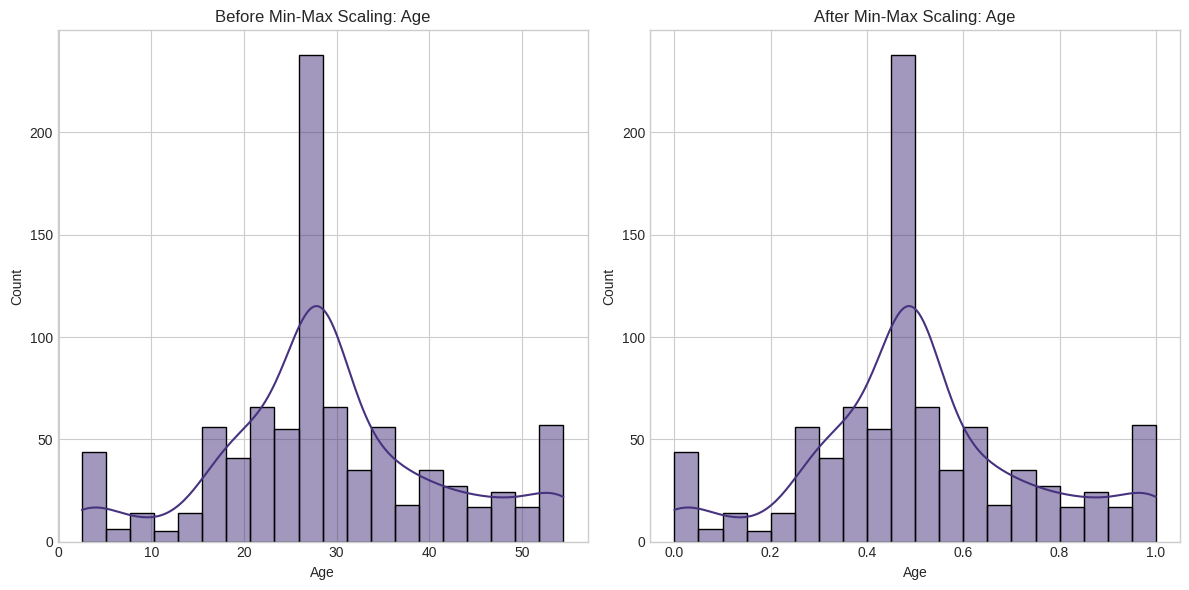

In [129]:
# Scaling Method 1: Min-Max Scaling
print("\nApplying Min-Max Scaling:")
min_max_scaler = MinMaxScaler()
df_transformed_minmax = df_transformed.copy()
if numeric_columns:
    df_transformed_minmax[numeric_columns] = min_max_scaler.fit_transform(df_transformed[numeric_columns])
    print(f"Min-Max Scaling applied to: {numeric_columns}")

    # Visualize before and after min-max scaling for the first numeric column
    if numeric_columns:
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        sns.histplot(df_transformed[numeric_columns[0]], kde=True)
        plt.title(f'Before Min-Max Scaling: {numeric_columns[0]}')

        plt.subplot(1, 2, 2)
        sns.histplot(df_transformed_minmax[numeric_columns[0]], kde=True)
        plt.title(f'After Min-Max Scaling: {numeric_columns[0]}')
        plt.tight_layout()
        plt.show()
        plt.savefig('minmax_scaling_comparison.png')
        plt.close()


Applying Standardization:
Standardization applied to: ['Age', 'Fare', 'Pclass', 'SibSp']


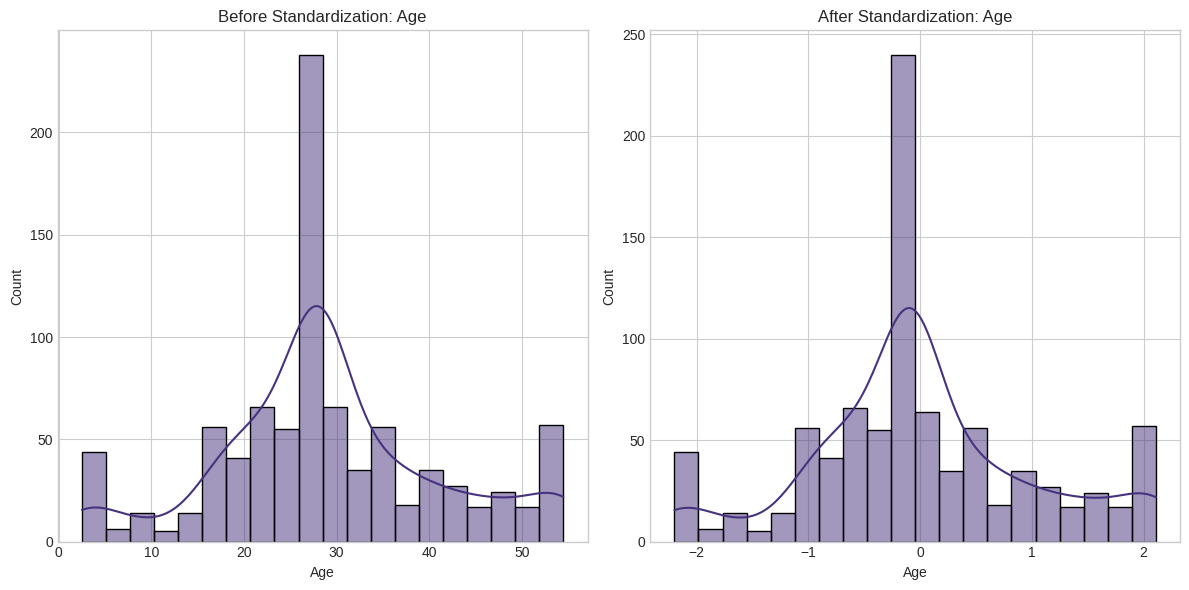

In [130]:
# Scaling Method 2: Standardization (Z-Score Normalization)
print("\nApplying Standardization:")
std_scaler = StandardScaler()
df_transformed_std = df_transformed.copy()
if numeric_columns:
    df_transformed_std[numeric_columns] = std_scaler.fit_transform(df_transformed[numeric_columns])
    print(f"Standardization applied to: {numeric_columns}")

    # Visualize before and after standardization for the first numeric column
    if numeric_columns:
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        sns.histplot(df_transformed[numeric_columns[0]], kde=True)
        plt.title(f'Before Standardization: {numeric_columns[0]}')

        plt.subplot(1, 2, 2)
        sns.histplot(df_transformed_std[numeric_columns[0]], kde=True)
        plt.title(f'After Standardization: {numeric_columns[0]}')
        plt.tight_layout()
        plt.show()
        plt.savefig('standardization_comparison.png')
        plt.close()

In [131]:
# Choose one of the scaled dataframes to proceed with
df_transformed = df_transformed_std.copy()  # Using standardized data

In [132]:
# Encoding Method 1: One-Hot Encoding for categorical features
print("\nApplying One-Hot Encoding:")
if categorical_columns:
    df_encoded = pd.get_dummies(df_transformed, columns=categorical_columns, drop_first=True)
    print(f"One-Hot Encoding applied to: {categorical_columns}")
    print(f"Shape before encoding: {df_transformed.shape}, after encoding: {df_encoded.shape}")
else:
    df_encoded = df_transformed.copy()
    print("No categorical columns to encode")


Applying One-Hot Encoding:
One-Hot Encoding applied to: ['Sex']
Shape before encoding: (891, 6), after encoding: (891, 6)


In [133]:
# Encoding Method 2: Label Encoding for categorical features
print("\nApplying Label Encoding:")
df_label_encoded = df_transformed.copy()
label_encoders = {}
if categorical_columns:
    for col in categorical_columns:
        le = LabelEncoder()
        df_label_encoded[col] = le.fit_transform(df_transformed[col])
        label_encoders[col] = le
        print(f"Label Encoding applied to: {col}, Mapping: {dict(zip(le.classes_, le.transform(le.classes_)))}")
    print(f"Shape before encoding: {df_transformed.shape}, after encoding: {df_label_encoded.shape}")
else:
    print("No categorical columns to encode")


Applying Label Encoding:
Label Encoding applied to: Sex, Mapping: {'female': 0, 'male': 1}
Shape before encoding: (891, 6), after encoding: (891, 6)


In [134]:
# Choose one of the encoding methods for further processing
df_processed_final = df_encoded.copy()  # Using one-hot encoding

In [135]:
# Preparing data for addressing class imbalance
print("\n6. ADDRESSING CLASS IMBALANCE")
print("-" * 50)


6. ADDRESSING CLASS IMBALANCE
--------------------------------------------------


In [136]:
# Prepare data for balancing
X = df_processed_final.drop('Survived', axis=1)
y = df_processed_final['Survived']

In [137]:
# Check class distribution
class_distribution = y.value_counts()
print("Class distribution before balancing:")
print(class_distribution)

Class distribution before balancing:
Survived
0    549
1    342
Name: count, dtype: int64


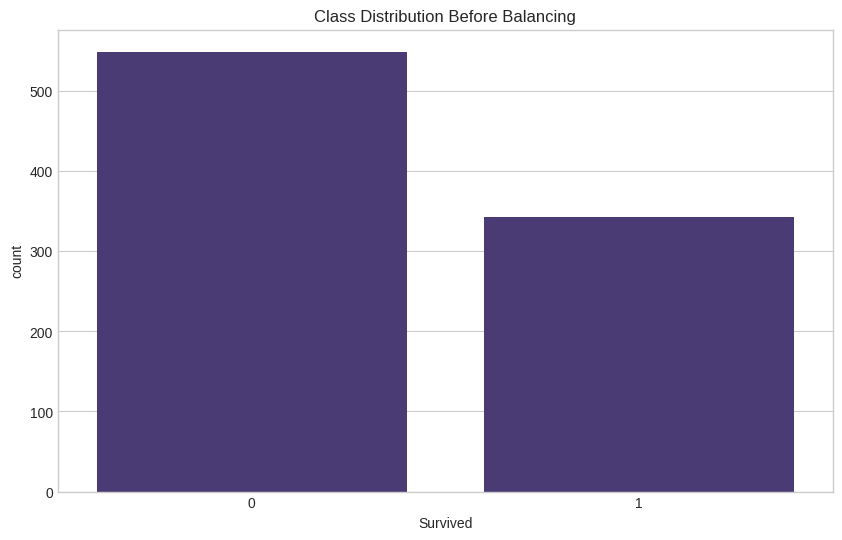

In [138]:
# Visualize class imbalance
plt.figure(figsize=(10, 6))
sns.countplot(x=y)
plt.title('Class Distribution Before Balancing')
plt.show()
plt.savefig('class_distribution_before.png')
plt.close()

In [139]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [140]:
# Method 1: Oversampling with SMOTE
print("\nApplying SMOTE Oversampling:")
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print(f"Training set size before SMOTE: {X_train.shape}, after SMOTE: {X_train_smote.shape}")
print("Class distribution after SMOTE:")
print(pd.Series(y_train_smote).value_counts())


Applying SMOTE Oversampling:
Training set size before SMOTE: (712, 5), after SMOTE: (888, 5)
Class distribution after SMOTE:
Survived
0    444
1    444
Name: count, dtype: int64


In [141]:
# Method 2: Random Undersampling
print("\nApplying Random Undersampling:")
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)
print(f"Training set size before undersampling: {X_train.shape}, after undersampling: {X_train_rus.shape}")
print("Class distribution after undersampling:")
print(pd.Series(y_train_rus).value_counts())


Applying Random Undersampling:
Training set size before undersampling: (712, 5), after undersampling: (536, 5)
Class distribution after undersampling:
Survived
0    268
1    268
Name: count, dtype: int64


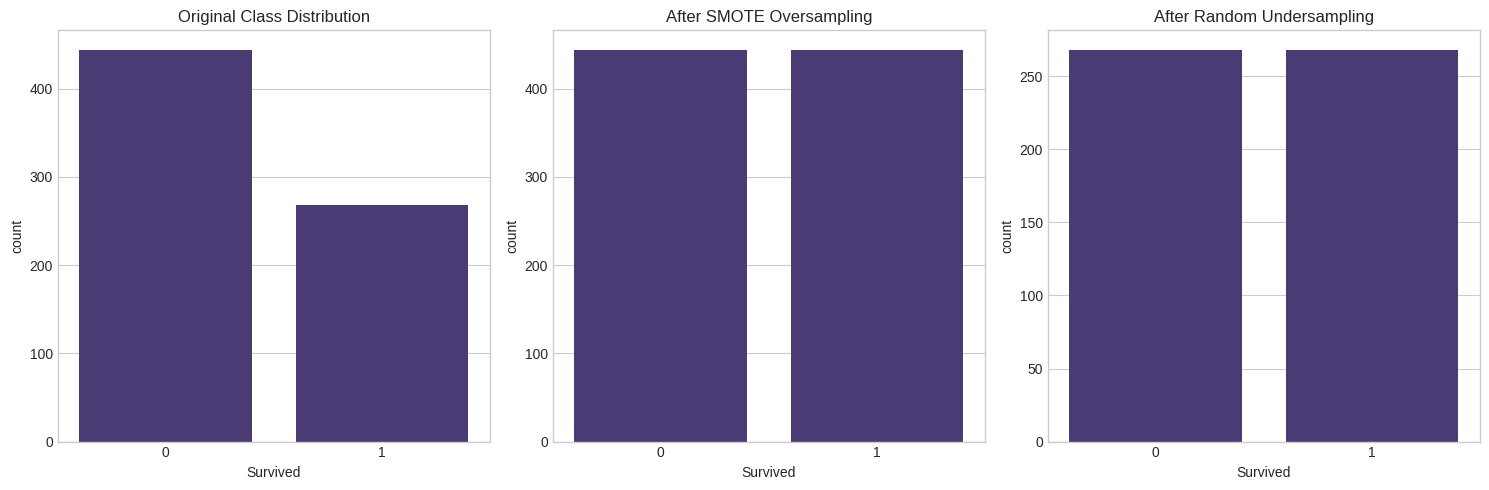

In [142]:
# Visualize class distribution after balancing
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.countplot(x=y_train)
plt.title('Original Class Distribution')

plt.subplot(1, 3, 2)
sns.countplot(x=y_train_smote)
plt.title('After SMOTE Oversampling')

plt.subplot(1, 3, 3)
sns.countplot(x=y_train_rus)
plt.title('After Random Undersampling')

plt.tight_layout()
plt.show()
plt.savefig('class_distribution_comparison.png')
plt.close()

In [143]:
# Final preprocessed dataframes
print("\n7. FINAL PREPROCESSED DATA")
print("-" * 50)

print("Original data shape:", df.shape)
print("Processed data after missing value imputation and outlier handling:", df_processed.shape)
print("Data after feature selection:", df_selected.shape)
print("Data after feature transformation and encoding:", df_processed_final.shape)
print("Training data after SMOTE:", X_train_smote.shape)
print("Training data after random undersampling:", X_train_rus.shape)


7. FINAL PREPROCESSED DATA
--------------------------------------------------
Original data shape: (891, 12)
Processed data after missing value imputation and outlier handling: (891, 11)
Data after feature selection: (891, 6)
Data after feature transformation and encoding: (891, 6)
Training data after SMOTE: (888, 5)
Training data after random undersampling: (536, 5)


In [144]:
# Save preprocessed datasets
print("\nSaving preprocessed datasets...")
df_processed.to_csv('processed_data_after_imputation_outlier_handling.csv', index=False)
df_selected.to_csv('data_after_feature_selection.csv', index=False)
df_processed_final.to_csv('final_preprocessed_data.csv', index=False)

print("\nSummary of preprocessing steps:")
print("1. Loaded the Titanic dataset and performed EDA")
print("2. Handled missing values using simple imputation techniques")
print("3. Detected and handled outliers using IQR and Z-score methods")
print("4. Selected important features using filter, wrapper, and embedded methods")
print("5. Transformed features using scaling (Min-Max, Standardization) and encoding (One-Hot, Label)")
print("6. Addressed class imbalance using SMOTE and random undersampling")
print("7. Saved preprocessed datasets for further analysis")


Saving preprocessed datasets...

Summary of preprocessing steps:
1. Loaded the Titanic dataset and performed EDA
2. Handled missing values using simple imputation techniques
3. Detected and handled outliers using IQR and Z-score methods
4. Selected important features using filter, wrapper, and embedded methods
5. Transformed features using scaling (Min-Max, Standardization) and encoding (One-Hot, Label)
6. Addressed class imbalance using SMOTE and random undersampling
7. Saved preprocessed datasets for further analysis


In [145]:
# Display sample of the final preprocessed data
print("\nSample of the final preprocessed data:")
print(df_processed_final.head())

print("\nPreprocessing pipeline complete!")


Sample of the final preprocessed data:
        Age      Fare    Pclass     SibSp  Survived  Sex_male
0 -0.583432 -0.820552  0.827377  0.432793         0      True
1  0.742685  2.031623 -1.566107  0.432793         1     False
2 -0.251903 -0.787578  0.827377 -0.474545         1     False
3  0.494038  1.419297 -1.566107  0.432793         1     False
4  0.494038 -0.781471  0.827377 -0.474545         0      True

Preprocessing pipeline complete!
